## Mathematical Model of a Neuron
Inputs: $$x_1, x_2, \ldots, x_n$$  
Weights: $$w_1, w_2, \ldots, w_n$$
Bias: $$b$$
Score (Activation): $w \cdot x + b$
Decision Function:
$$
f(x) = \begin{cases}
+1 & \text{if } w \cdot x + b > 0 \\
-1 & \text{if } w \cdot x + b \leq 0
\end{cases}
$$
$ w \cdot x = \sum_i w_i x_i$

## About misclassification

A point is misclassified if:
$$ x \cdot w + b \le 0 $$

y is true label, in \{-1, +1\}$

If misclassified, goal is to increase y s.t it becomes positive:

#  Perceptron vs McCulloch-Pitts (MP) Neuron

### MP Neuron

- Inputs: Only **binary** (0 or 1).
- Weights: Fixed; no learning.
- Output: 0 or 1 (binary).
- Used mainly to model simple logic gates (AND, OR).

---

### Perceptron

- Inputs: Can be **real-valued** (continuous).
- Weights: **Learned** via update rule.
- Output: Usually +1 or -1.
- Used to model linearly separable patterns, supports learning from data.

---

### Key difference

MP neuron = fixed logic unit (no training).

Perceptron = adaptive learning unit (weights & bias adjust to data).

## Perceptron Update Rule
$$
w` = w + \eta y x
$$

$$
b` = b + \eta y
$$

here $\eta$ is the learning rate usually 1, $y$ is the true label, and $x$ is the input vector.

After Update:
$$
y (w' \cdot x + b') = y (w \cdot x + b) + \eta (x \cdot x) + \eta
$$

new score strictly increases if misclassified.

Challenges of perceptron:
- **Cannot classify non linearly separable data: Perceptron can only handle linearly separable patterns**

Epoch 1, Sample [0 0], Target 0, Score 0.0, Weights [0. 0.], Bias 0.0
Epoch 1, Sample [0 1], Target 0, Score 0.0, Weights [0. 0.], Bias 0.0
Epoch 1, Sample [1 0], Target 0, Score 0.0, Weights [0. 0.], Bias 0.0
Epoch 1, Sample [1 1], Target 1, Score 0.0, Weights [1. 1.], Bias 1.0
Epoch 2, Sample [0 0], Target 0, Score 1.0, Weights [1. 1.], Bias 1.0
Epoch 2, Sample [0 1], Target 0, Score 2.0, Weights [1. 1.], Bias 1.0
Epoch 2, Sample [1 0], Target 0, Score 2.0, Weights [1. 1.], Bias 1.0
Epoch 2, Sample [1 1], Target 1, Score 3.0, Weights [1. 1.], Bias 1.0
Epoch 3, Sample [0 0], Target 0, Score 1.0, Weights [1. 1.], Bias 1.0
Epoch 3, Sample [0 1], Target 0, Score 2.0, Weights [1. 1.], Bias 1.0
Epoch 3, Sample [1 0], Target 0, Score 2.0, Weights [1. 1.], Bias 1.0
Epoch 3, Sample [1 1], Target 1, Score 3.0, Weights [1. 1.], Bias 1.0
Epoch 4, Sample [0 0], Target 0, Score 1.0, Weights [1. 1.], Bias 1.0
Epoch 4, Sample [0 1], Target 0, Score 2.0, Weights [1. 1.], Bias 1.0
Epoch 4, Sample [1 0

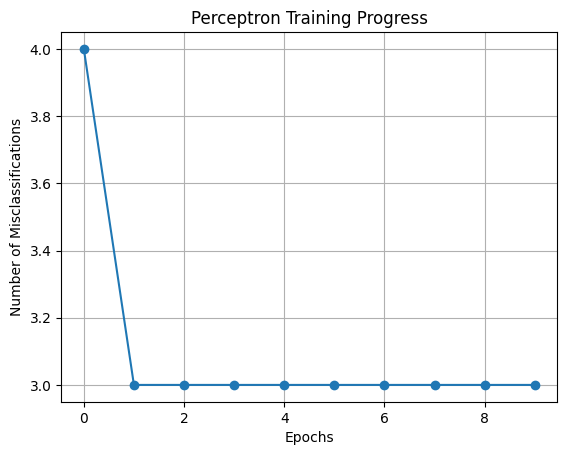

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# AND Gate test data
X = np.array([
[0, 0],
[0, 1],
[1, 0],
[1, 1]
])

y = np.array([0, 0, 0, 1])  # AND gate output

w = np.zeros(X.shape[1] )  # Initialize weights
b = 0
eta = 1.0
epochs = 10
errors = []

for epoch in range(epochs):
    error_count = 0
    for xi, target in zip(X,y):
        score = np.dot(xi,w)+ b
        if target * score <= 0:
            w += eta * target * xi
            b += eta * target
            error_count += 1

        print(f'Epoch {epoch+1}, Sample {xi}, Target {target}, Score {score}, Weights {w}, Bias {b}')
    errors.append(error_count)


print(f'Final Weights: {w}, Final Bias: {b}')


plt.plot(errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications') 
plt.title('Perceptron Training Progress')
plt.grid(True)
plt.show()



    
    

## Decision Boundary PLot

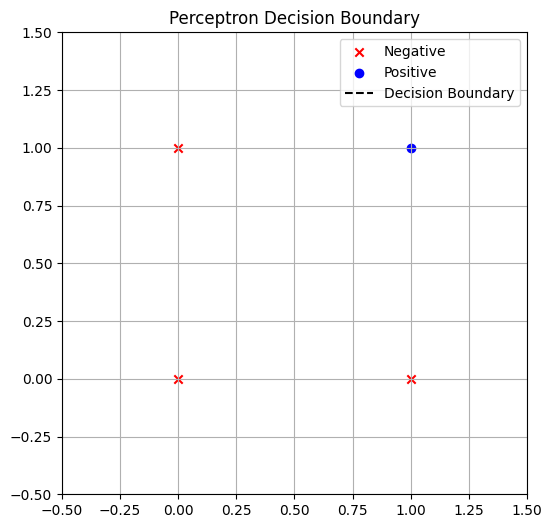

In [5]:
def plot_decision_boundary(X, y, w, b):
    plt.figure(figsize=(6, 6))
    for xi, yi in zip(X, y):
        if yi == 1:
            plt.scatter(xi[0], xi[1], color='blue', marker='o', label='Positive' if 'Positive' not in plt.gca().get_legend_handles_labels()[1] else "")
        else:
            plt.scatter(xi[0], xi[1], color='red', marker='x', label='Negative' if 'Negative' not in plt.gca().get_legend_handles_labels()[1] else "")
    x1 = np.linspace(-0.5, 1.5, 10)
    x2 = -(w[0] * x1 + b) / w[1]
    plt.plot(x1, x2, 'k--', label='Decision Boundary')
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.legend()
    plt.grid(True)
    plt.title('Perceptron Decision Boundary')
    plt.show()

plot_decision_boundary(X, y, w, b)


In [6]:
import torch

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

w_torch = torch.zeros(X.shape[1])
b_torch = torch.zeros(1)
eta = 1.0
epochs = 10

for epoch in range(epochs):
    for xi, target in zip(X_tensor, y_tensor):
        score = torch.dot(xi, w_torch) + b_torch
        if target * score <= 0:
            w_torch += eta * target * xi
            b_torch += eta * target
        print(f"Epoch {epoch}, xi={xi.tolist()}, y={target.item()}, score={score.item():.2f}, w={w_torch.tolist()}, b={b_torch.item()}")

print("Final weights (PyTorch):", w_torch)
print("Final bias (PyTorch):", b_torch)


Epoch 0, xi=[0.0, 0.0], y=0.0, score=0.00, w=[0.0, 0.0], b=0.0
Epoch 0, xi=[0.0, 1.0], y=0.0, score=0.00, w=[0.0, 0.0], b=0.0
Epoch 0, xi=[1.0, 0.0], y=0.0, score=0.00, w=[0.0, 0.0], b=0.0
Epoch 0, xi=[1.0, 1.0], y=1.0, score=0.00, w=[1.0, 1.0], b=1.0
Epoch 1, xi=[0.0, 0.0], y=0.0, score=1.00, w=[1.0, 1.0], b=1.0
Epoch 1, xi=[0.0, 1.0], y=0.0, score=2.00, w=[1.0, 1.0], b=1.0
Epoch 1, xi=[1.0, 0.0], y=0.0, score=2.00, w=[1.0, 1.0], b=1.0
Epoch 1, xi=[1.0, 1.0], y=1.0, score=3.00, w=[1.0, 1.0], b=1.0
Epoch 2, xi=[0.0, 0.0], y=0.0, score=1.00, w=[1.0, 1.0], b=1.0
Epoch 2, xi=[0.0, 1.0], y=0.0, score=2.00, w=[1.0, 1.0], b=1.0
Epoch 2, xi=[1.0, 0.0], y=0.0, score=2.00, w=[1.0, 1.0], b=1.0
Epoch 2, xi=[1.0, 1.0], y=1.0, score=3.00, w=[1.0, 1.0], b=1.0
Epoch 3, xi=[0.0, 0.0], y=0.0, score=1.00, w=[1.0, 1.0], b=1.0
Epoch 3, xi=[0.0, 1.0], y=0.0, score=2.00, w=[1.0, 1.0], b=1.0
Epoch 3, xi=[1.0, 0.0], y=0.0, score=2.00, w=[1.0, 1.0], b=1.0
Epoch 3, xi=[1.0, 1.0], y=1.0, score=3.00, w=[1.0, 1.0]